# Pima Indians Diabetes Database

- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

| Column Name                         | Description                                                                 |
|-------------------------------------|-----------------------------------------------------------------------------|
| Pregnancies  | This represents the number of times the patient has been pregnant|
| Glucose      | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BloodPressure | Diastolic Blood pressure |
| SkinThickness | Triceps skin fold thickness (mm)  |
| Insulin   |2-Hour serum insulin (mu U/ml)|
| BMI | Body mass index (weight in kg/(height in m)^2) |
| Diabetes pedigree function  | A component of the GCS that evaluates a patient’s verbal response, indicating their level of consciousness. |
| Age   | Age (years) |
| Outcome | Class variable (0 or 1)|

## Exercise 1. Steps to Evaluate a Model

In [3]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [4]:
#loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Lorraine254/AppliedMachineLearning/main/Assignment%203/diabetes.csv?token=GHSAT0AAAAAACWMJQ7OJ4UVPLOJOHXG4QTWZW7D4KQ')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Data Understanding**

In [5]:
#shape of the dataset
shape=data.shape
print('--------------------------------------------')
print('The dataset contains', shape[0], 'rows and', shape[1], 'columns.')
print('--------------------------------------------')



--------------------------------------------
The dataset contains 768 rows and 9 columns.
--------------------------------------------


In [6]:
#checking the datatypes
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

- All the variables in the dataset are numerical

**Descriptive Statistics**

In [7]:
# performing descriptive statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Insights:**

- **Pregnancies:**   
    - Has 768 data points which is equivalent to the number of rows thus implying no missing values
    - On average, the women in the dataset have had about 3.85 pregnancies.
    - The mean>median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
    - The minimum number of pregnancies in the dataset is 0 while the maximum is 17. Thus some women experienced high number of pregnancies
- **Glucose:**
    - Has 768 data points.
    - The average glucose level for the women in the dataset is approximately 120.89 mg/dL.
    - The mean (120.89) is greater than the median (117), indicating that the data is skewed to the right.
    - he minimum glucose level is 0  and the maximum is 199 mg/dL.
    
- **Blood Pressure:**
    - Has 768 data points which is equivalent to the number of rows thus implying no missing values
    - On average blood pressure for the women in the dataset is about 69.105.
    - The mean< median(50%), thus implying a slight skew to the left, which is represented by the standard deviation also
    - The minimum  blood pressure in the dataset is 0 while the maximum is 122. 
- **SkinThickness:**
    - Has 768 data points which is equivalent to the number of rows thus implying no missing values
    - On average skin thickess for the women in the dataset is about 20.53.
    - The mean< median(50%), thus implying a slight skew to the left, which is represented by the standard deviation also
    - The minimum skin thickness in the dataset is 0 while the maximum is 99.  
- **Insulin	:**
    - Number of records: 768
    - Has a maximum value of 846 and a minimum value of 0
    - The mean is greater than the median hence the is data is experiencing skewness
    - The values fall between 0(the minimum) and 846(maximum) anything above or below it can be regarded as an outlier
    - On average, the insulin levels in the dataset were at 79.8
    - The mean > median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
    - The minimum skin thickness in the dataset is 0 while the maximum is 67.  

- **BMI:**
    - Has 768 data points which is equivalent to the number of rows thus implying no missing values
    - On average BMI for the women in the dataset is about 31.99.
    - The mean is slightly less than median(50%), thus implying a slight skew to the left, which is represented by the standard deviation also
    - The minimum BMI in the dataset is 0 while the maximum is 67.10.   

- **DiabetesPedigreeFunction:**
    - Has 768 data points which is equivalent to the number of rows thus implying no missing values
    - On average DiabetesPedigree Function for the women in the dataset is about 0.47.
    - The mean is greater than median(50%), thus implying the variable is skewed to the right, which is represented by the standard deviation also.
    - The minimum DiabetesPedigree Function in the dataset is 0.078 while the maximum is 2.42.  

- **Age:**
    - Number of records: 768
    - Has a maximum value of 81 and a minimum value of 21
    - The mean is greater than the median hence the is data is experiencing skewness
    - The values fall between 21(the minimum) and 81(maximum) anything above or below it can be regarded as an outlier
    - On average, the age in the dataset were at 33.2
    - The mean > median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
    - The minimum age in the dataset is 21 while the maximum is 81. Thus the largest age group fall in older group  

- **Outcome:**
    - Outcome:
    - Number of records: 768
    - Has a maximum value of 1 and a minimum value of 0
    - The mean is greater than the median hence the is data is experiencing skewness
    - The values fall between 0(the minimum) and 1(maximum) anything above or below it can be regarded as an outlier
    - On average, the outcome fall at 0.35.
    - The mean > median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
    - The minimum number of outcomes in the dataset is 0 while the maximum is 1

**Splitting the data into train and test**

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

# First we split data into Target and Input Features
X = data.drop(columns='Outcome')
y = data['Outcome']

X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
# creating the train dataframe
dfTrain=pd.concat([X_train,y_train],axis=1)
dfTrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0
231,6,134,80,37,370,46.2,0.238,46,1
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,0
106,1,96,122,0,0,22.4,0.207,27,0
270,10,101,86,37,0,45.6,1.136,38,1
435,0,141,0,0,0,42.4,0.205,29,1


In [11]:
# creating the test dataframe
dfTest=pd.concat([X_test,y_test],axis=1)
dfTest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49,1
534,1,77,56,30,56,33.3,1.251,24,0
344,8,95,72,0,0,36.8,0.485,57,0
296,2,146,70,38,360,28.0,0.337,29,1


**Transformation and Normalization**

In [12]:
trainLabel = np.asarray(dfTrain ["Outcome"])
trainData = np.asarray(dfTrain . iloc [:,0:8])
testLabel = np.asarray(dfTest ["Outcome"])
testData = np.asarray(dfTest . iloc [:,0:8])
means = np.mean(trainData , axis =0 )
stds = np.std(trainData , axis =0 )
trainData =(trainData - means )/ stds
testData = (testData - means )/ stds

**Creating the model**

In [13]:
#creating an instance of the model
model = LogisticRegression ()
model.fit(trainData , trainLabel)

LogisticRegression()

In [14]:
# Evaluating the model
accuracy = model.score ( testData , testLabel )
print (" accuracy = ", accuracy * 100 , "%")

 accuracy =  75.32467532467533 %


### Questions

**1. Analyze the data in the dataframe and briefly present your most relevant conclusions.**

- Univariate Analysis of the target variable

In [15]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

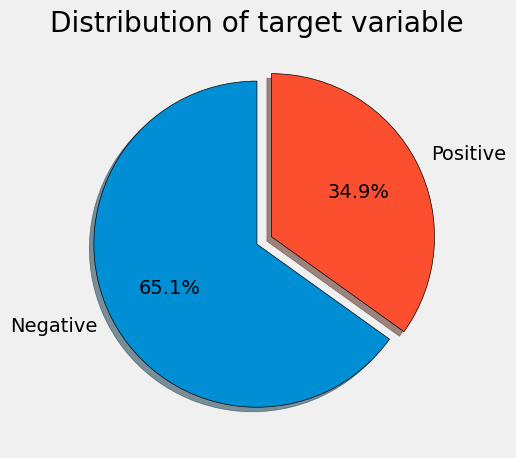

In [16]:
# Pie chart of the target variable
plt.style.use('fivethirtyeight')

slices=[500,268]
labels=['Negative','Positive']
explode=[0,0.1]

plt.pie(slices,labels=labels,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Distribution of target variable')
plt.tight_layout()
plt.show()

- From the diagram above the target variable is clearly imbalanced. As a result this may result in biasness in the performance of our model

**2. In which cases is it appropriate to use less than 20% of the data, and why?**

It is common to use 80% of the data for training and hold out 20%
for testing. However, this depends on the size of the dataset: if it
contains 10 million instances, then holding out 1% means your test
set will contain 100,000 instances: that’s probably more than
enough to get a good estimate of the generalization error

**3.Check that the input data, trainData and testData, are normalized, indicating the Python code used for this. Why shouldn’t we normalize the trainLabel and testLabel sets?**

Normalizing them can distort the meaning of the labels and can make the prediction less interpretable.

Python code->cell 16

**4.Once the model has been evaluated, can you comment on what you think of the metrics used and the result obtained taking into account the nature of the dataframe considered?**

The metric used in the dataset is accuracy. Considering our target variable is imbalanced, the accuracy metric may be biased towards the class that has majority of observations

## Exercise 2. Metrics


In this second exercise, we will aim to correctly interpret the different metrics used to evaluate a
model. First, we will show how to represent the ROC Curve for the case of logistic regression in
Python. Recall that the ROC curve is the result of varying the detection threshold (classification). In
our case, since the ”Outcome” attribute is equal to 1 for a patient with a positive diabetes diagnosis,
increasing the detection threshold means reducing both the detection probability and the false alarm
probability.


**Quesion 5:**

**Comparing the ROC curve obtained with the random case (diagonal), what can you say about the selected classifier? Observing the trend of the curve, what type of threshold would you use (high or low)?**

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


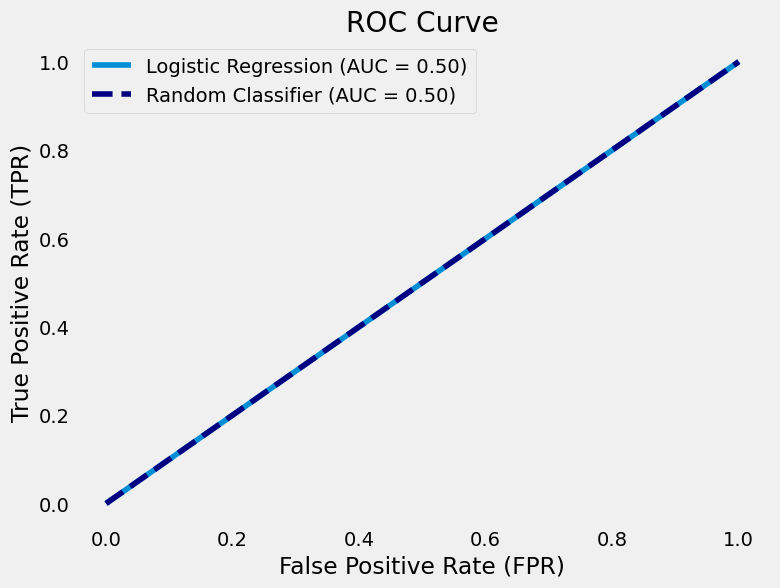

In [17]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

Both the Logistic Regression and the random classifier are overlapping, and both have an Area Under the Curve (AUC) of 0.50. This indicates that the classifier is performing no better than random guessing. Choosing a high or low threshold will not significantly change the model's performance, 

**Question 6:**
**Fill in the following table for different probability threshold values.**

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Initialize a list to store results
results = []

for threshold in thresholds:
    y_pred_thresh = np.where(y_pred_prob > threshold,1,0)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    sensitivity = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    tpr = sensitivity
    fpr = fp / (fp + tn)
    results.append([threshold, accuracy, sensitivity, f1, tpr, fpr])

# Convert results to a DataFrame for easy viewing
import pandas as pd
columns = ['Threshold', 'Accuracy', 'Sensitivity', 'F1 Score', 'TPR', 'FPR']
df_results = pd.DataFrame(results, columns=columns)

# Display the results
print(df_results)


   Threshold  Accuracy  Sensitivity  F1 Score  TPR  FPR
0        0.0  0.357143          1.0  0.526316  1.0  1.0
1        0.2  0.357143          1.0  0.526316  1.0  1.0
2        0.4  0.357143          1.0  0.526316  1.0  1.0
3        0.6  0.357143          1.0  0.526316  1.0  1.0
4        0.8  0.357143          1.0  0.526316  1.0  1.0
5        1.0  0.642857          0.0  0.000000  0.0  0.0


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


**Question 7:**
**What do you observe in the extreme cases when the threshold is 0 or 1?**

- At threshold 0, the model classifies everything as positive, resulting in perfect sensitivity but poor overall performance due to the high false positive rate.
- At threshold 1, the model classifies everything as negative, resulting in no false positives but missing all true positives.
 

**Question 8:**
**What do the metrics of Sensitivity and Recall contribute compared to Accuracy?**

Sensitivity/Recall is critical when you need to capture as many positive cases as possible, even at the cost of more false positives.Accuracy provides an overall view but can be misleading when the class distribution is imbalanced or when positive cases are much more important than negative ones.

**Question 9: If the diabetes diagnosis study were to be used to select individuals for a general screening through laboratory tests to find diabetics, which probability threshold value would you choose? Justify your answer**

- Based on the above, none of the thresholds are good enough. A good model should have a TPR=1 and FPR=0.

## Exercise 3. Imbalanced data

In the previous exercises, you might have observed that the diabetes dataset is imbalanced, and this has some impact on the evaluation metrics. Now we will use an even more imbalanced dataset.
Specifically, you should consider the dataset diabetesDes.csv that you have in the virtual classroom. You are asked to follow the same steps as in Exercises 1 and 2 for this case.

In [19]:
#loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Lorraine254/AppliedMachineLearning/main/Assignment%203/diabetesDes.csv?token=GHSAT0AAAAAACWMJQ7OLKWMOTGKT23T2TPQZW7D5SA')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,1,89,66,23,94,28.1,0.167,21,0
3,5,116,74,0,0,25.6,0.201,30,0
4,10,115,0,0,0,35.3,0.134,29,0


**Data Understanding**

In [20]:
#shape of the dataset
shape=df.shape
print('--------------------------------------------')
print('The dataset contains', shape[0], 'rows and', shape[1], 'columns.')
print('--------------------------------------------')

--------------------------------------------
The dataset contains 560 rows and 9 columns.
--------------------------------------------


**Descriptive Statistics**

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,3.460714,112.267857,67.978571,19.189286,65.750000,30.846607,0.440207,31.712500,0.110714
std,3.092242,28.220884,19.157839,15.373463,98.888899,8.043212,0.317145,11.618312,0.314059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,94.000000,62.000000,0.000000,0.000000,25.900000,0.233750,23.000000,0.000000
50%,2.000000,109.000000,70.000000,20.000000,0.000000,30.800000,0.340000,27.000000,0.000000
75%,5.000000,128.000000,78.000000,31.000000,100.000000,35.700000,0.574000,37.000000,0.000000
max,13.000000,197.000000,122.000000,63.000000,744.000000,59.400000,2.420000,81.000000,1.000000


**Insights:**

- **Pregnancies:**   
    - Has 560 data points which is equivalent to the number of rows thus implying no missing values
    - On average, the women in the dataset have had about 3.46 pregnancies.
    - The mean>median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
    - The minimum number of pregnancies in the dataset is 0 while the maximum is 13. Thus some women experienced high number of pregnancies
- **Glucose:**
    - Has 560 data points.
    - The average glucose level for the women in the dataset is approximately 112.26 mg/dL.
    - The mean (112.26) is greater than the median (117), indicating that the data is skewed to the right.
    - The minimum glucose level is 0  and the maximum is 197 mg/dL.

- **Age:**
    - Number of records: 560
    - The mean is greater than the median hence the is data is experiencing skewness
    - On average, the age in the dataset were at 33.2
    - The mean > median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
    - The minimum age in the dataset is 21 while the maximum is 81. Thus the largest age group fall in older group  
  
    

**Splitting the train and test**

In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

# First we split data into Target and Input Features
X = df.drop(columns='Outcome')
y = df['Outcome']

X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [24]:
# creating the train dataframe
df_train=pd.concat([X_train,y_train],axis=1)
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
522,0,134,58,20,291,26.4,0.352,21,0
462,10,92,62,0,0,25.9,0.167,31,0
0,6,148,72,35,0,33.6,0.627,50,1
11,8,99,84,0,0,35.4,0.388,50,0
286,1,143,74,22,61,26.2,0.256,21,0
...,...,...,...,...,...,...,...,...,...
71,0,125,96,0,0,22.5,0.262,21,0
106,5,147,78,0,0,33.7,0.218,65,0
270,1,100,66,29,196,32.0,0.444,42,0
435,1,108,88,19,0,27.1,0.400,24,0


In [25]:
# creating the test dataframe
df_test=pd.concat([X_test,y_test],axis=1)
df_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
453,2,108,64,0,0,30.8,0.158,21,0
341,0,123,88,37,0,35.2,0.197,29,0
177,1,193,50,16,375,25.9,0.655,24,0
86,5,132,80,0,0,26.8,0.186,69,0
332,0,119,66,27,0,38.8,0.259,22,0
...,...,...,...,...,...,...,...,...,...
88,1,88,30,42,99,55.0,0.496,26,1
235,8,126,88,36,108,38.5,0.349,49,0
352,6,166,74,0,0,26.6,0.304,66,0
33,7,150,66,42,342,34.7,0.718,42,0


**Transformation and Normalization**

In [26]:
trainLabel = np.asarray(df_train ["Outcome"])
trainData = np.asarray(df_train . iloc [:,0:8])
testLabel = np.asarray(df_test ["Outcome"])
testData = np.asarray(df_test . iloc [:,0:8])
means = np.mean(trainData , axis =0 )
stds = np.std(trainData , axis =0 )
trainData =(trainData - means )/ stds
testData = (testData - means )/ stds

**Create a model**

In [27]:
#creating an instance of the model
model2 = LogisticRegression ()
model2.fit(trainData , trainLabel)

LogisticRegression()

In [28]:
# Evaluating the model
accuracy = model2.score ( testData , testLabel )
print (" accuracy = ", accuracy * 100 , "%")

 accuracy =  88.39285714285714 %


### Questions

**1. Analyze the data in the dataframe and briefly present your most relevant conclusions.**

In [29]:
df['Outcome'].value_counts()

Outcome
0    498
1     62
Name: count, dtype: int64

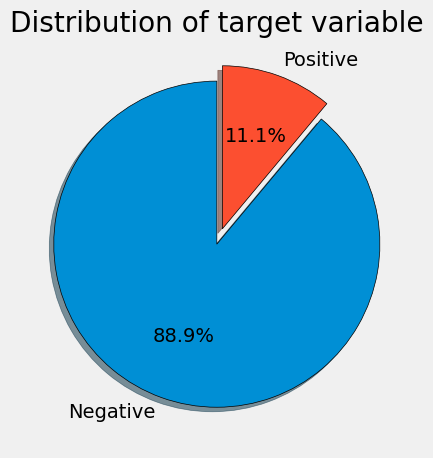

In [30]:
# Pie chart of the target variable
plt.style.use('fivethirtyeight')

slices=[498,62]
labels=['Negative','Positive']
explode=[0,0.1]

plt.pie(slices,labels=labels,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Distribution of target variable')
plt.tight_layout()
plt.show()

## Exercise 2: Metrics

**Comparing the ROC curve obtained with the random case (diagonal), what can you say about the selected classifier? Observing the trend of the curve, what type of threshold would you use (high or low)?**

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


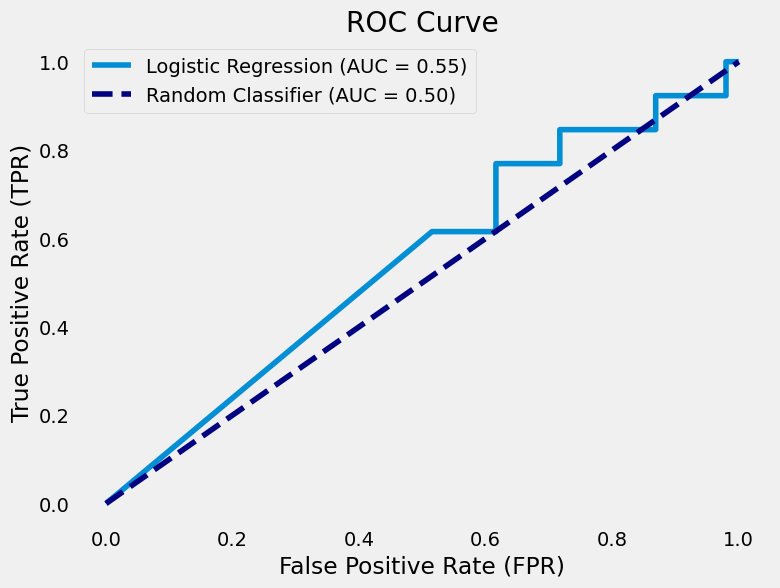

In [31]:
# Predict probabilities for the test set
y_pred_prob = model2.predict_proba(X_test)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

- In this ROC curve, the Logistic Regression model has an Area Under the Curve (AUC) of 0.55, which is only slightly better than a random classifier (represented by the diagonal line, AUC = 0.50). This indicates that the Logistic Regression model is not performing much better than random guessing in distinguishing between classes.

**Fill in the following table for different probability threshold values.**

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Predict probabilities for the test set
y_pred_prob = model2.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Initialize a list to store results
results = []

for threshold in thresholds:
    y_pred_thresh = np.where(y_pred_prob > threshold,1,0)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    sensitivity = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    tpr = sensitivity
    fpr = fp / (fp + tn)
    results.append([threshold, accuracy, sensitivity, f1, tpr, fpr])

# Convert results to a DataFrame for easy viewing
import pandas as pd
columns = ['Threshold', 'Accuracy', 'Sensitivity', 'F1 Score', 'TPR', 'FPR']
df_results = pd.DataFrame(results, columns=columns)

# Display the results
print(df_results)


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


   Threshold  Accuracy  Sensitivity  F1 Score       TPR       FPR
0        0.0  0.116071     1.000000  0.208000  1.000000  1.000000
1        0.2  0.250000     0.846154  0.207547  0.846154  0.828283
2        0.4  0.250000     0.846154  0.207547  0.846154  0.828283
3        0.6  0.250000     0.846154  0.207547  0.846154  0.828283
4        0.8  0.250000     0.846154  0.207547  0.846154  0.828283
5        1.0  0.883929     0.000000  0.000000  0.000000  0.000000


**What do you observe in the extreme cases when the threshold is 0 or 1?**

- At a threshold of 0, the model classifies everything as positive, maximizing recall (sensitivity) but severely compromising precision and overall accuracy. 
- At a threshold of 1, the model classifies everything as negative, leading to perfect precision (no false positives), but it completely fails to identify any positive cases, resulting in zero recall. 
 

**Question 8:**
**What do the metrics of Sensitivity and Recall contribute compared to Accuracy?**

Sensitivity/Recall is critical when you need to capture as many positive cases as possible, even at the cost of more false positives.Accuracy provides an overall view but can be misleading when the class distribution is imbalanced or when positive cases are much more important than negative ones.

**Question 9: If the diabetes diagnosis study were to be used to select individuals for a general screening through laboratory tests to find diabetics, which probability threshold value would you choose? Justify your answer**

- Based on the above, none of the thresholds are good enough. A good model should have a TPR=1,which means the model correctly identifies all actual positive cases, leaving no missed positive cases (no false negatives) and FPR=0 means the model never misclassifies a negative case as positive, avoiding any false positives.